# Prueba Técnica para Ingeniero de Datos keppri

## PROBLEMA DE NEGOCIO
El banco enfrenta un problema de cancelación de productos por parte de los clientes. El objetivo de esta prueba es analizar los datos  roporcionados para identificar las causas de la deserción de clientes.

### Tareas principales:
- Preprocesamiento de Datos: Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

- Exploración de Datos: Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

- Construcción de Modelos: Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

- Evaluación y Selección del Modelo: Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

### 1. Configuración del Ambiente
En este paso cargo las librerias que considero importante y que utilizare en todo el proceso

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import  roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_validate, ShuffleSplit
import graphviz
from pathlib import Path
from sklearn.tree import export_graphviz

In [351]:
archivo_csv = 'BankChurners.csv'

# Leer todo el contenido del archivo y reemplazar '"' por ''
with open(archivo_csv, 'r', encoding='utf-8-sig') as file:
    contenido = file.read().replace('"', '')

# Guardar el contenido modificado en un nuevo archivo temporal
archivo_temporal = 'temp.csv'
with open(archivo_temporal, 'w', encoding='utf-8-sig') as file:
    file.write(contenido)

# Leer el archivo temporal con Pandas
df = pd.read_csv(archivo_temporal, sep=',')

# Opcional: Eliminar el archivo temporal después de usarlo
import os
os.remove(archivo_temporal)


### 2. Preprocesamiento de Datos
Aca realizare unos pequeños analisis exploratorios iniciales, los cuales me ayudan a entender un poco el tamaño, las columnas, los valores nulos, valores repetidos, dimensiones de las variables y tipos de datos

Aca eliminamos las ultimas dos columnas que no son necesarias 

In [352]:
df = df.iloc[:, :-2]

In [353]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


revisar el tamaño del datframe

In [354]:
df.shape

(10127, 21)

reviisar informacion de cada una de las columnas

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

revisar los datos de las columnas númericas

In [356]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [357]:
df.describe().shape

(8, 15)

observar valores nulos

In [358]:
k = df.isna().sum()
k[k!=0]

Series([], dtype: int64)

observar valores duplicados

In [359]:
df[df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


Clientes duplicados 

In [360]:
df[df.CLIENTNUM.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [361]:
df_origin = df.copy()

### CONCLUSIONES ITEM 2.
Se entinede cada una de las columnas y se sobreentiende que la columna de salida para analizar es Attrition_Flag, la cual es la que hace refencia si la cuenta esta activa o no. Existing Customer si la cuenta está activa Attrited Customer si la cuenta está cerrada.
Nos damos cuenta que excluyendo las columna de CLIENTNUM y Attrition_Flag, son 19 columnas a analizar
Se tiene que hay 14 columnas numericas y 6 variables categoricas, que con ayuda de tecnicas en el EDA y una exploracion más a fondo se tomara desiciones
No se encuentran valores nulos. lo cual es bueno.
Tampoco se encuentran valores duplicados, ni clientes duplicados. lo cual es bueno.

### 3. Exploración de Datos
Acá lo que se realizara es técnicas EDA, para dectectar patrones, correlaciones, y asi definir que columnas son las que se van a tener en cuenta

Remplazar Attrition_Flag a 1 si es 'Existing Customer', 0 si es 'Attrited Customer'

#### operaciones antes de las visualizaciones

In [362]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({
    'Existing Customer': 1,
    'Attrited Customer': 0
})

lo mismo para el genero 

In [363]:
df['Gender'] = df['Gender'].replace({
    'M': 0,
    'F': 1
})

In [364]:
# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include='number')

In [365]:
# Seleccionar solo las columnas numéricas
df_categoricas = df.select_dtypes(include=['object'])

In [366]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,0,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,1,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Grafica de correlacion todos 


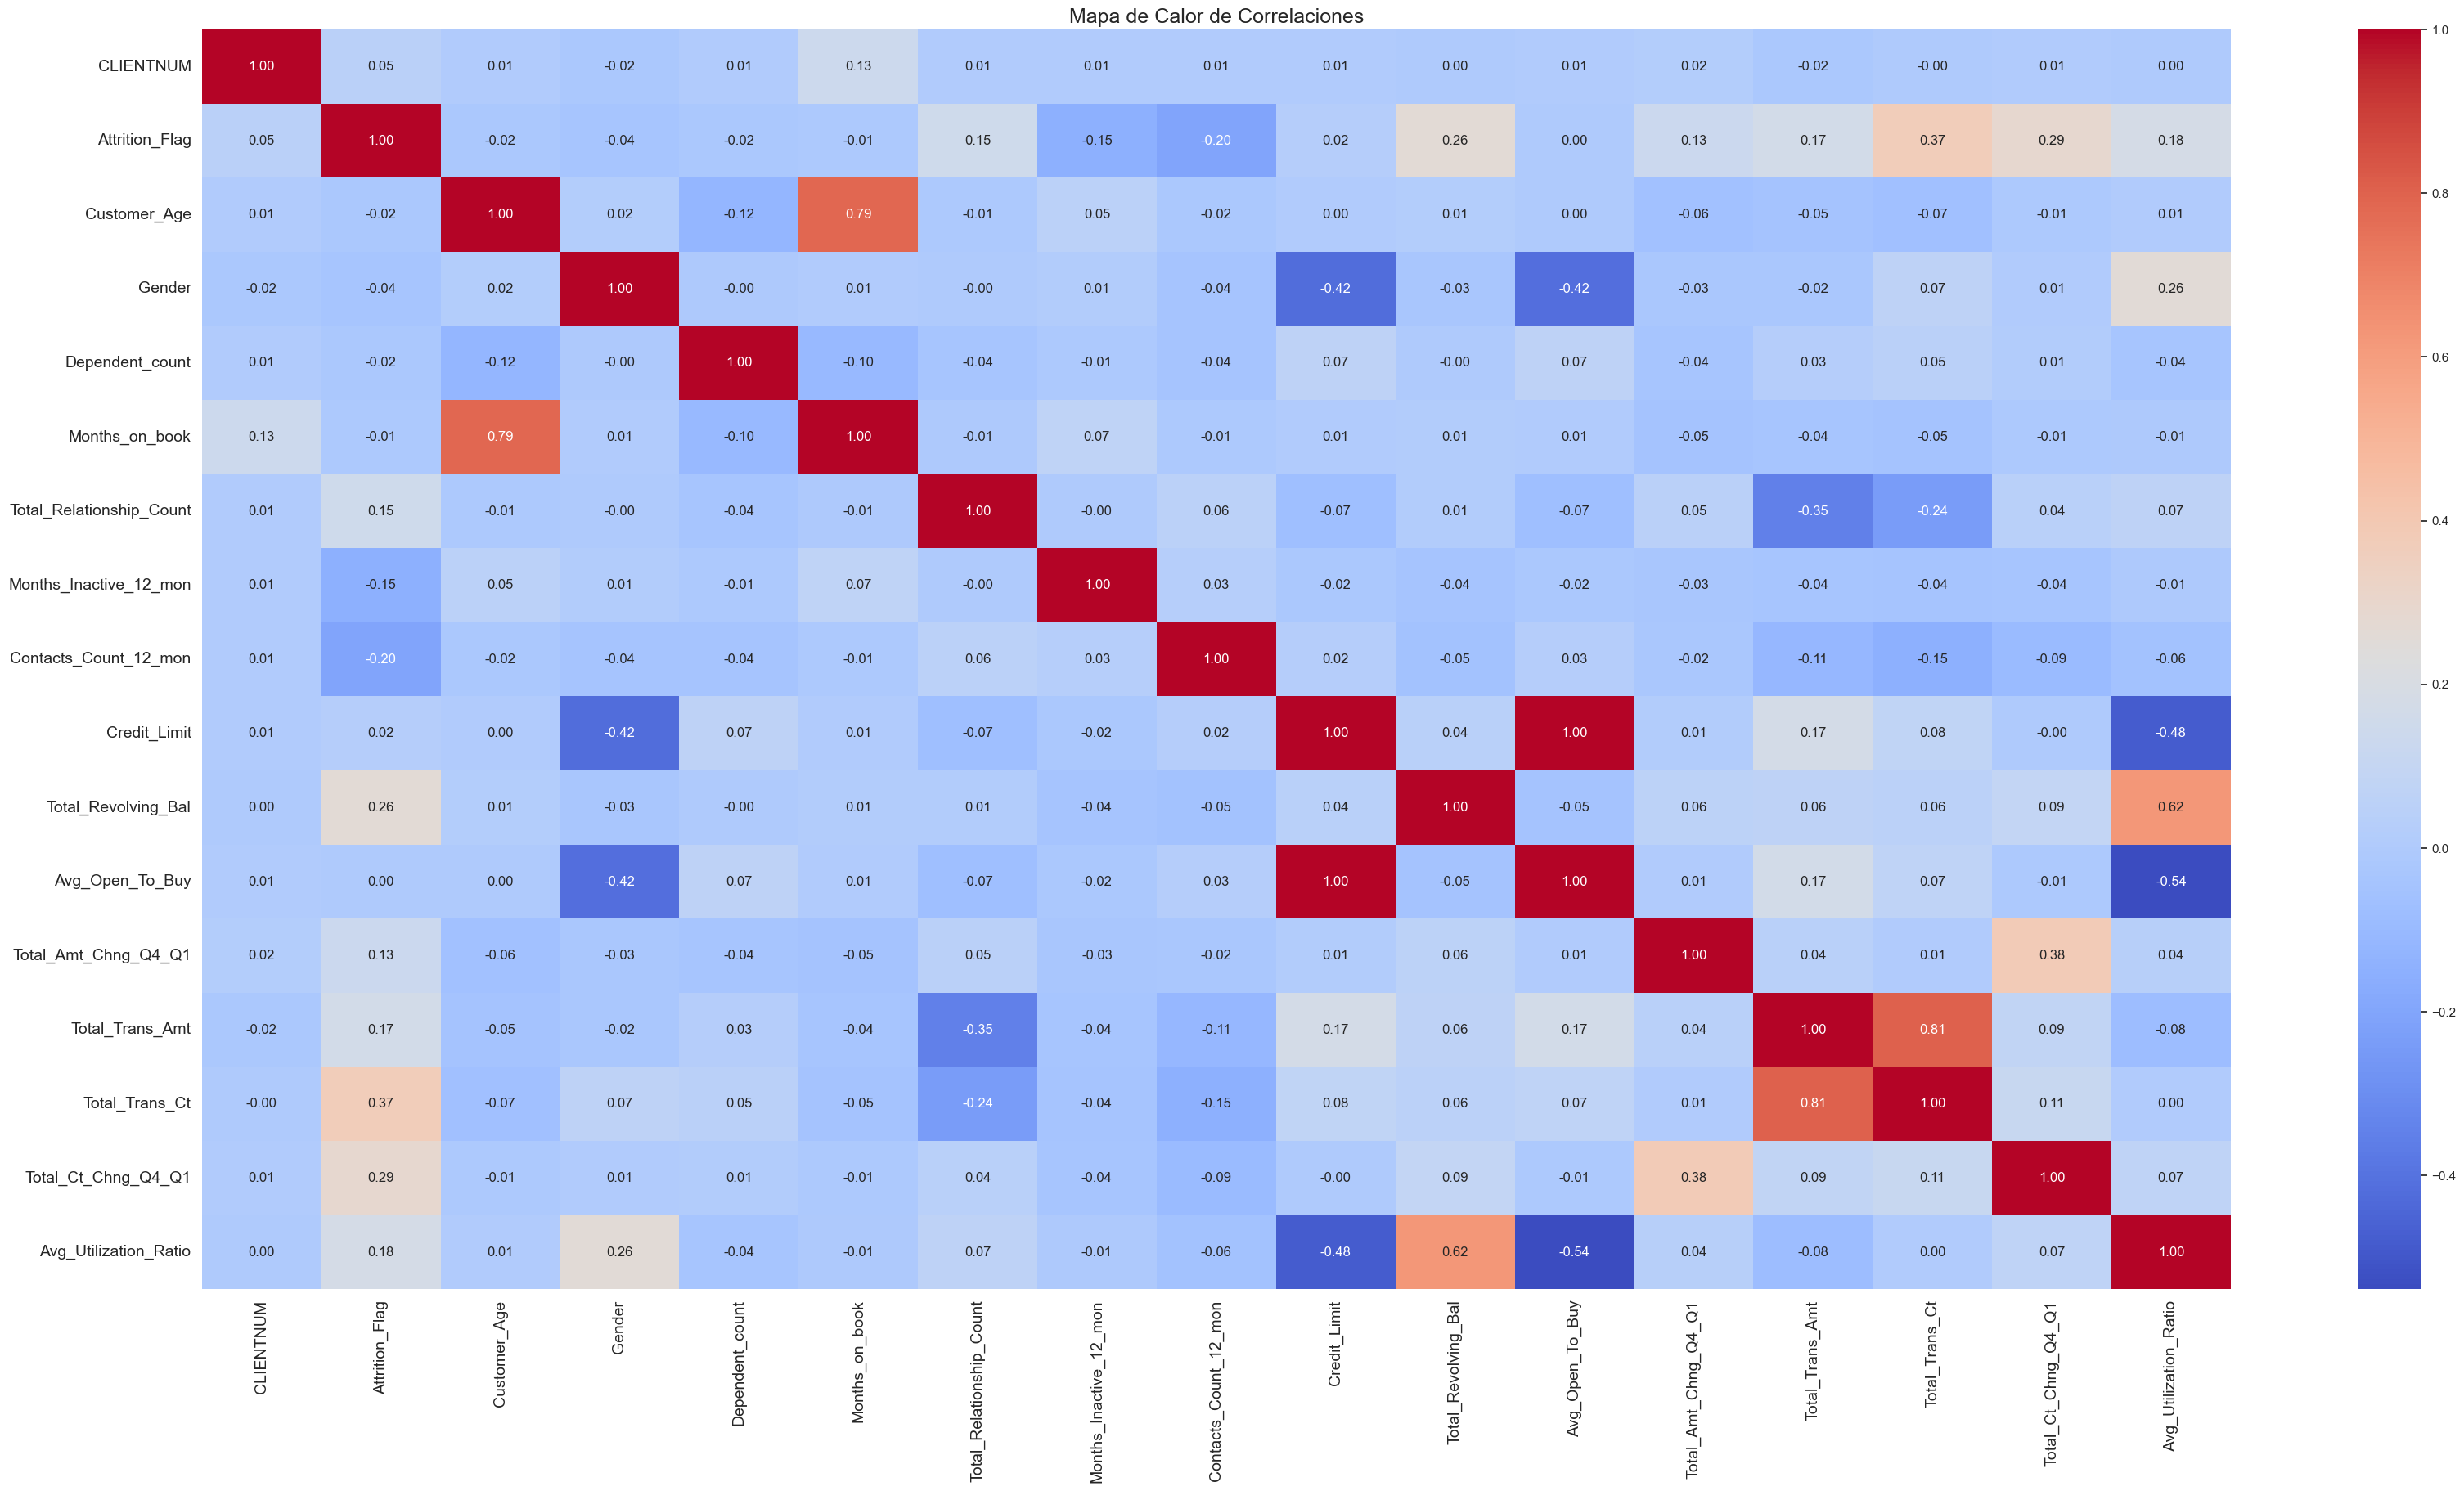

In [367]:
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [368]:
df_categoricas

,Education_Level,Marital_Status,Income_Category,Card_Category
0,High School,Married,$60K - $80K,Blue
1,Graduate,Single,Less than $40K,Blue
2,Graduate,Married,$80K - $120K,Blue
3,High School,Unknown,Less than $40K,Blue
4,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...
10122,Graduate,Single,$40K - $60K,Blue
10123,Unknown,Divorced,$40K - $60K,Blue
10124,High School,Married,Less than $40K,Blue
10125,Graduate,Unknown,$40K - $60K,Blue


In [369]:
columnas_categoricas = df_categoricas.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

Analisis Variables categoricas 

In [370]:
# # Obtener una lista de todas las columnas categóricas en el DataFrame
# columnas_categoricas = df_categoricas.columns

# # Realizar la prueba de chi-cuadrado para cada par de variables categóricas
# resultados_chi2 = {}
# for columna in columnas_categoricas:
#     if columna != 'default':  # Evitar comparar la variable categórica con ella misma
#         contingency_table = pd.crosstab(df['Attrition_Flag'], df_categoricas[columna])
#         chi2, p, dof, expected = chi2_contingency(contingency_table)
#         resultados_chi2[columna] = {'chi2': chi2, 'p-valor': p}

# # Imprimir los resultados
# for columna, resultado in resultados_chi2.items():
#     print(f"Asociación entre 'default' y '{columna}':")
#     print("Valor de chi-cuadrado:", resultado['chi2'])
#     print("P-valor:", resultado['p-valor'])

In [371]:
# # Crear listas separadas para 'chi2' y 'p-valor'
# variables = list(resultados_chi2.keys())
# chi2_values = [resultados_chi2[key]['chi2'] for key in resultados_chi2]
# p_valor_values = [resultados_chi2[key]['p-valor'] for key in resultados_chi2]

# # Configuración de la gráfica de barras para chi2
# fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# # Crear las barras para chi2
# ax[0].bar(variables, chi2_values, label='chi2', color='b')
# ax[0].set_ylabel('Valor de chi2')
# ax[0].set_title('Valores de chi2 por variable')

# # Configuración de la gráfica de barras para p-valor
# # Crear las barras para p-valor
# ax[1].bar(variables, p_valor_values, label='p-valor', color='r')
# ax[1].set_xlabel('Variables')
# ax[1].set_ylabel('Valor de p-valor')
# ax[1].set_title('Valores de p-valor por variable')

# # Rotar los nombres de los ejes x y ajustar el tamaño de la fuente
# ax[0].set_xticklabels(variables, rotation=45)
# ax[1].set_xticklabels(variables, rotation=45)
# ax[0].tick_params(axis='x', labelsize=8)
# ax[1].tick_params(axis='x', labelsize=8)

# # Ajustar el diseño y mostrar las gráficas
# plt.tight_layout()
# plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17988\3776548996.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.Attrition_Flag[k[c]==v], label=v)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17988\3776548996.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.Attrition_Flag[k[c]==v], label=v)


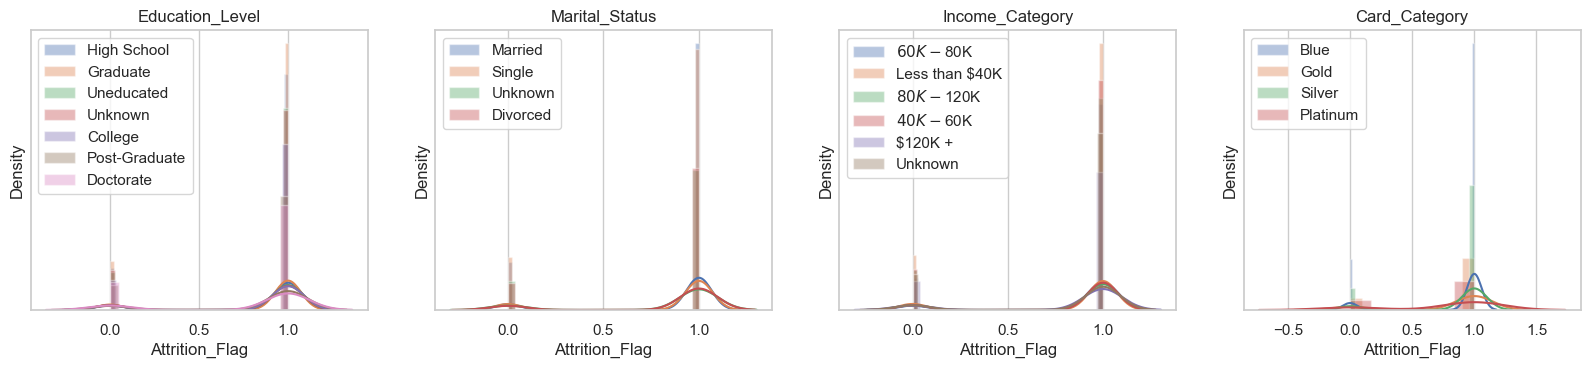

In [372]:
plt.figure(figsize=(20,8))
for i,c in enumerate(columnas_categoricas):    
    plt.subplot(2,4,i+1)
    # Crea el DataFrame "k" con las columnas de interés y elimina filas con valores faltantes
    k=df[[c,"Attrition_Flag"]].dropna()
      # Itera a través de los valores únicos de la columna actual
    for v in df[c].dropna().unique():
        # Gráfico de distribución para cada valor único de la columna
        sns.distplot(k.Attrition_Flag[k[c]==v], label=v)
        plt.title(c) # Establece el título del gráfico
    plt.yticks([])# Elimina las marcas del eje y
    plt.legend() # Muestra la leyenda

In [373]:
def group(df,x):
    df_1 = df.groupby(['Attrition_Flag',x], as_index=False)['CLIENTNUM'].count()
    return df_1

In [374]:
pd.crosstab(df['Income_Category'], df['Card_Category'])

Card_Category,Blue,Gold,Platinum,Silver
Income_Category,,,,
$120K +,645,18,4,60
$40K - $60K,1675,15,1,99
$60K - $80K,1273,29,4,96
$80K - $120K,1395,21,2,117
Less than $40K,3403,24,4,130
Unknown,1045,9,5,53


Aca quisiera como organizar y verificar datos inusuales pero no tengo mucho contexto de los montos de las Card_Category para saber si hay anomalias claras 

In [375]:
columnas_categoricas

Index(['Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [376]:
group(df,'Education_Level')

,Attrition_Flag,Education_Level,CLIENTNUM
0,0,College,154
1,0,Doctorate,95
2,0,Graduate,487
3,0,High School,306
4,0,Post-Graduate,92
5,0,Uneducated,237
6,0,Unknown,256
7,1,College,859
8,1,Doctorate,356
9,1,Graduate,2641


In [377]:
group(df,'Marital_Status')

,Attrition_Flag,Marital_Status,CLIENTNUM
0,0,Divorced,121
1,0,Married,709
2,0,Single,668
3,0,Unknown,129
4,1,Divorced,627
5,1,Married,3978
6,1,Single,3275
7,1,Unknown,620


## Valores atipicos

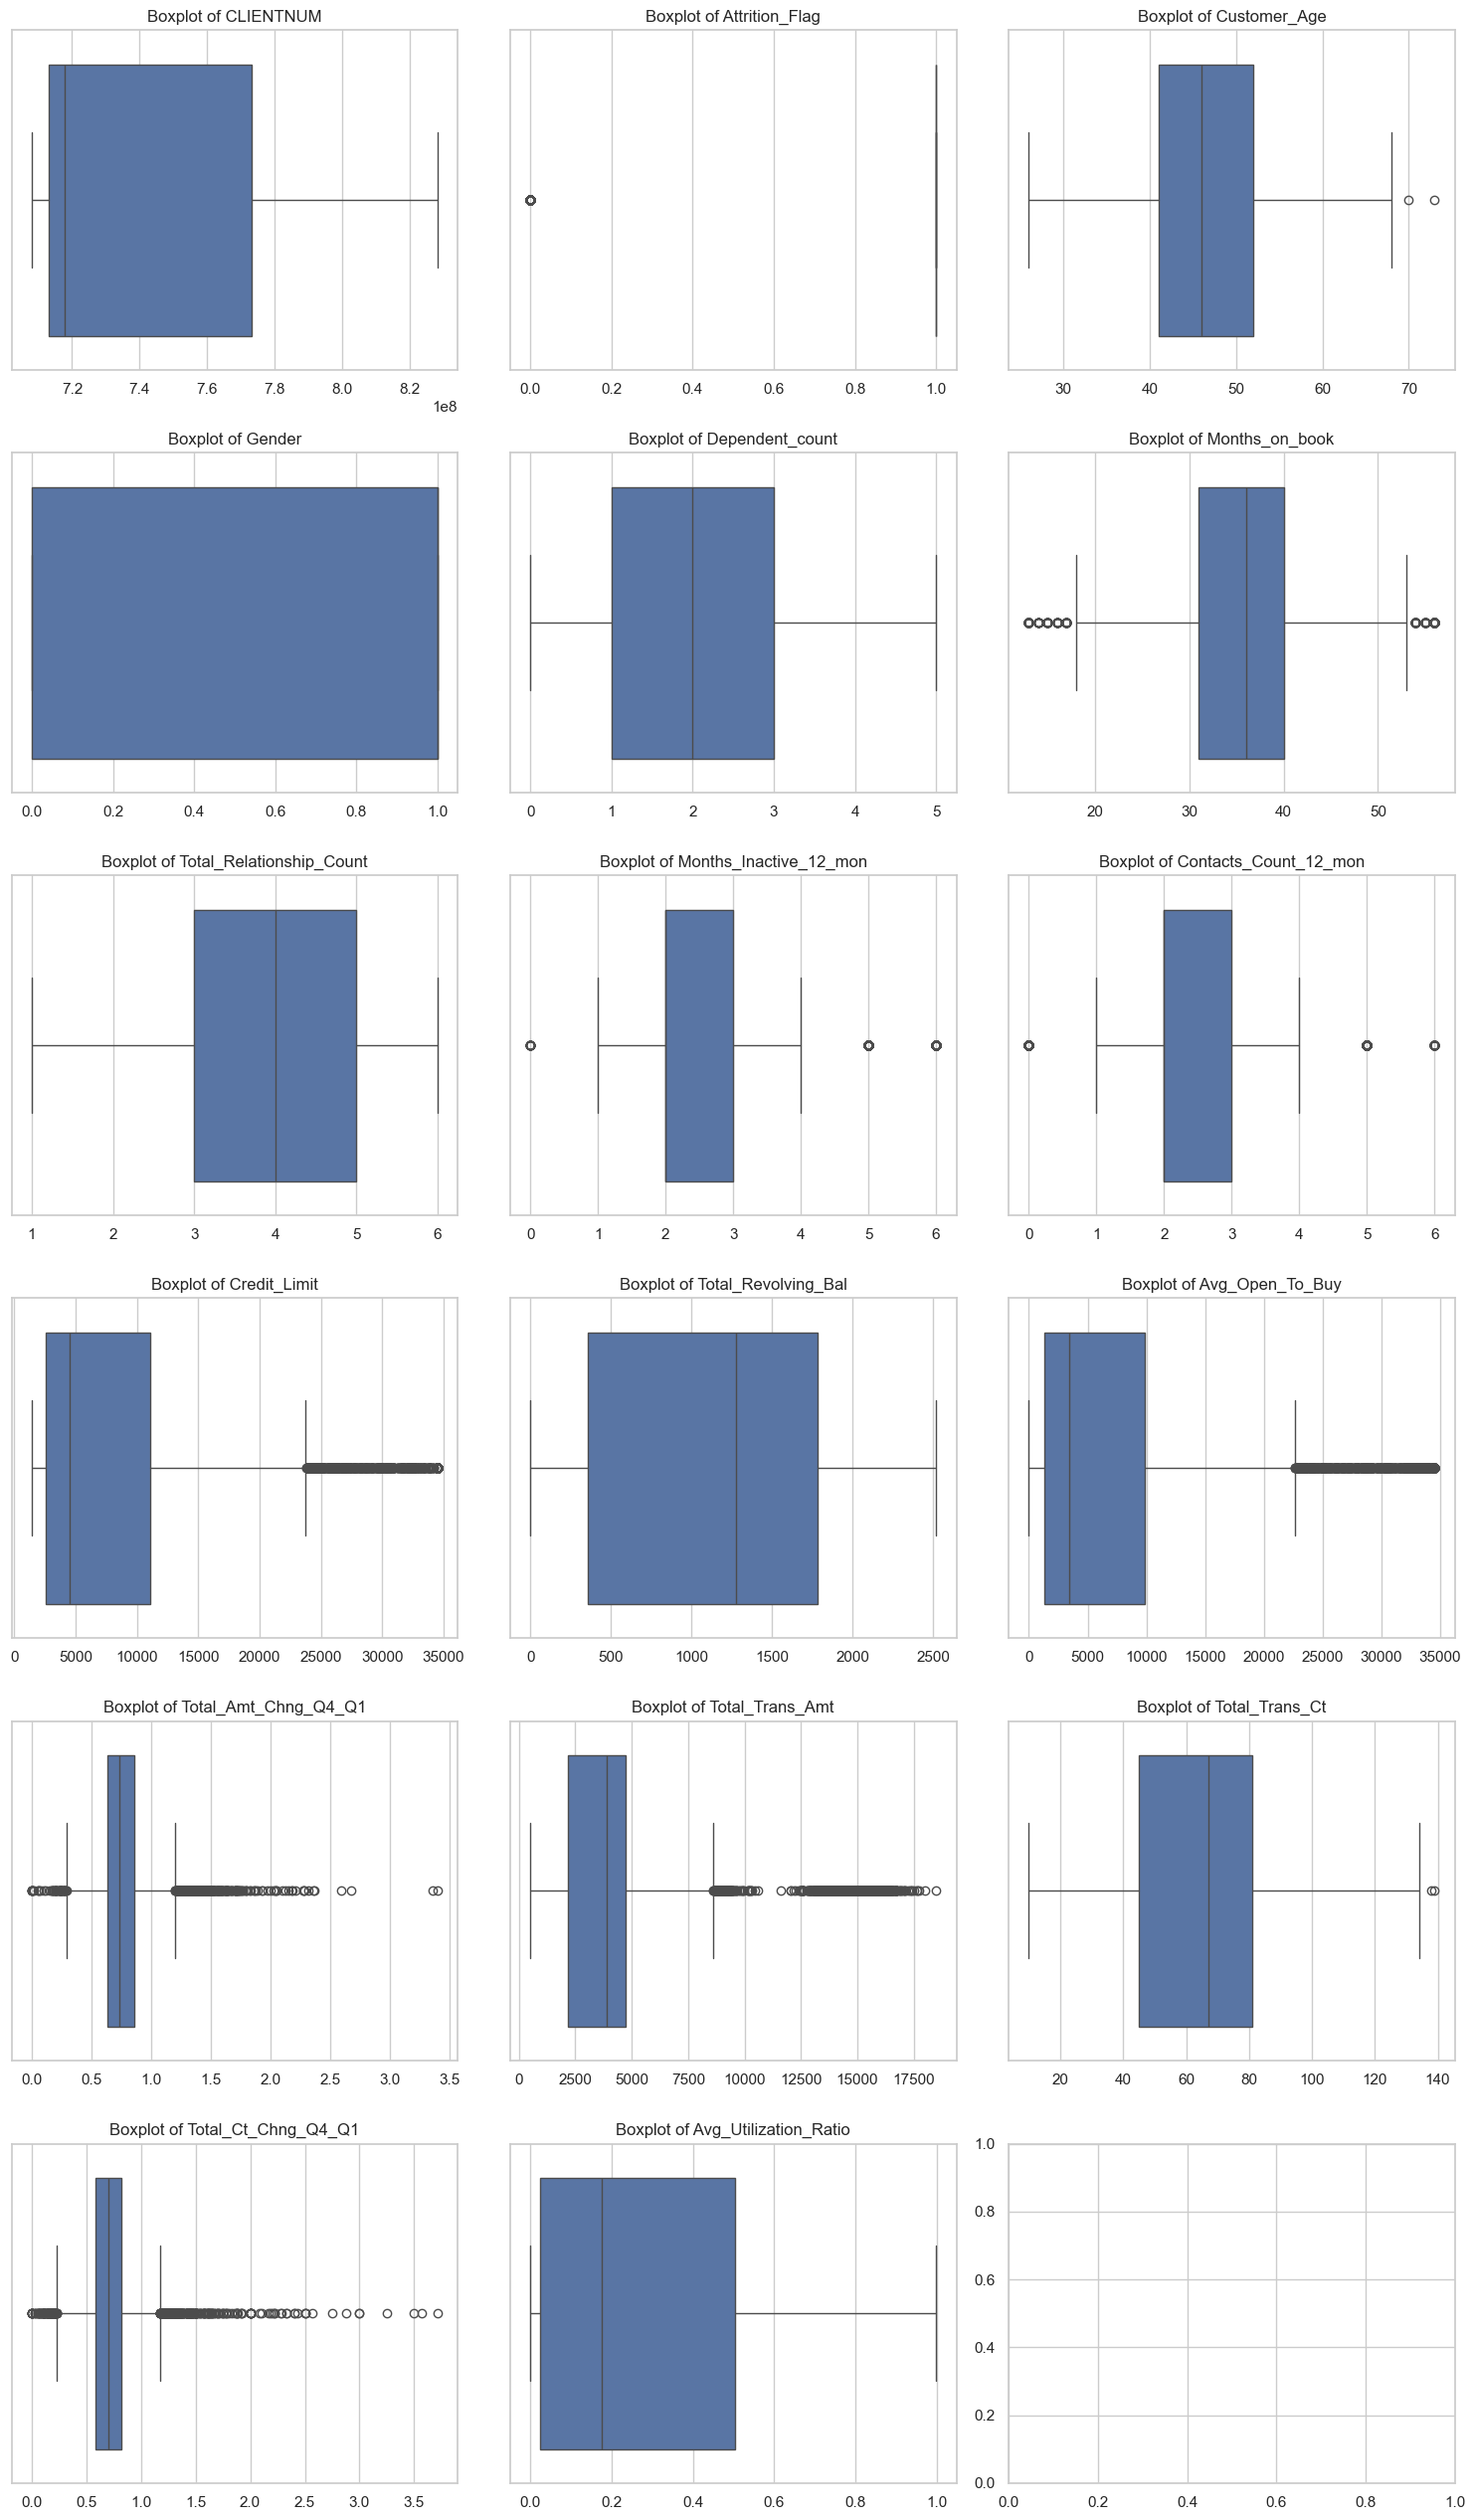

In [378]:
# Configuración de los gráficos para que se vean mejor
sns.set(style="whitegrid")

# Seleccionar las columnas numéricas del dataframe
numerical_columns = df_numericas.columns

# Crear subplots para mostrar todos los boxplots de las columnas numéricas
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(15, len(numerical_columns) * 1.5))
axes = axes.flatten()

# Graficar cada columna numérica en un boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajustar el layout para que no haya superposición de gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### CONCLUSIONES VISUALIZACIONES.
* Establecer rangos en algunas columnas, es decir creear nuevas columnas a partir de columnas exitentes estableciendo rangos columnas opcionadas (Customer_Age:,Months_on_book:,Credit_Limit:), esto para tener un mayor manejo de los valores atipicos y Mejora la precisión predictiva.
* Elimiar posibles columnas de las cuales, que segun lo resulados arojados que supuestamente no tienen tanta relacion con default ( 'Gender:', 'Dependent_count:')
* Juntar posibles columnas (Total_Revolving_Bal y Avg_Utilization_Ratio, Total_Trans_Amt y Total_Trans_Ct, Credit_Limit y Avg_Open_To_Buy)

### OPERACIONES CON COLUMNAS

Establecer rangos a las variables

In [379]:
# Definir los límites de los rangos de edad
bins = [18, 30, 40, 50, 60, 100]  # Puedes ajustar estos límites según tus necesidades

# Definir las etiquetas para los rangos
labels = ['18-29', '30-39', '40-49', '50-59', '65+']

# Utilizar pd.cut para dividir la columna 'age' en los rangos definidos
df['age_range'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

In [380]:
# Definir los límites de los rangos de 'Months_on_book'
months_bins = [0, 19, 32, 49, 72, 100]

# # Definir las etiquetas para los rangos
months_labels = ['0-18', '19-32', '32-48', '49-72', '72+']

# Utilizar pd.cut para dividir la columna 'Months_on_book' en los rangos definidos
df['months_on_book_range'] = pd.cut(df['Months_on_book'], bins=months_bins, labels=months_labels, right=False)

Agrupar por cuantiles 

In [381]:
def range_df(C,Y,df):
    # Usando pd.qcut para dividir en cuartiles y obtener los rangos directamente
    df[C] = pd.qcut(df[Y], q=4)
    # Mostrar los límites de los cuartiles
    df[C] = df[C].apply(lambda x: f'{x.left}-{x.right}')
    return df

In [382]:
df_bi = df.copy()

combinar columnas 

In [383]:
# df['Combined_Revolving_Utilization'] = df['Total_Revolving_Bal'] * df['Avg_Utilization_Ratio']

# df['Combined_Trans'] = df['Total_Trans_Amt'] * df['Total_Trans_Ct']

df['Combined_Credit_Limit'] = df['Credit_Limit'] * df['Avg_Open_To_Buy']

Eliminar las columnas originales de los rangos y las columnas que consideré que se podrian eliminar optimizando el modelo

In [384]:
df = df.drop(['Customer_Age','Credit_Limit','Avg_Open_To_Buy','Months_on_book'], axis=1)

Manejo de las varaibles categoricas 
aca lo que se busca es que se maneje unicamente variables númericas 

In [385]:
def reasignar_category_a_enteros(df):
    for columna in df.select_dtypes(include=['object', 'category']).columns:
        valores_unicos = df[columna].unique()
        diccionario_reasignacion = {valor: indice for indice, valor in enumerate(valores_unicos)}
        df[columna] = df[columna].map(diccionario_reasignacion)
    return df

In [386]:
df = reasignar_category_a_enteros(df)
df.head()

,CLIENTNUM,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,age_range,months_on_book_range,Combined_Credit_Limit
0,768805383,1,0,3,0,0,0,0,39,5,...,3,777,1.335,1144,42,1.625,0.061,0,0.0,151200574.0
1,818770008,1,1,5,1,1,1,0,44,6,...,2,864,1.541,1291,33,3.714,0.105,0,0.0,61028352.0
2,713982108,1,0,3,1,0,2,0,36,4,...,0,0,2.594,1887,20,2.333,0.000,1,0.0,11682724.0
3,769911858,1,1,4,0,2,1,0,34,3,...,1,2517,1.405,1171,20,2.333,0.760,0,0.0,2637148.0
4,709106358,1,0,3,2,0,0,0,21,5,...,0,0,2.175,816,28,2.500,0.000,0,1.0,22240656.0


Normalizacion
la normalización se realiza para asegurar que las variables estén en una escala comparable, mejorar el desempeño de los modelo.

In [387]:
# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Normaliza todas las columnas del DataFrame
df_normalized = df.copy()  # Crear una copia del DataFrame original
df_normalized[df.columns] = scaler.fit_transform(df_normalized[df.columns])

In [388]:
df_normalized.head()

,CLIENTNUM,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,age_range,months_on_book_range,Combined_Credit_Limit
0,0.504929,1.0,0.0,0.6,0.000000,0.000000,0.0,0.0,0.604651,0.8,...,0.500000,0.308701,0.392994,0.035273,0.248062,0.437534,0.061061,0.00,0.000000,0.126910
1,0.920398,1.0,1.0,1.0,0.166667,0.333333,0.2,0.0,0.720930,1.0,...,0.333333,0.343266,0.453636,0.043452,0.178295,1.000000,0.105105,0.00,0.000000,0.051220
2,0.049060,1.0,0.0,0.6,0.166667,0.000000,0.4,0.0,0.534884,0.6,...,0.000000,0.000000,0.763615,0.076611,0.077519,0.628164,0.000000,0.25,0.000000,0.009800
3,0.514130,1.0,1.0,0.8,0.000000,0.666667,0.2,0.0,0.488372,0.4,...,0.166667,1.000000,0.413600,0.036775,0.077519,0.628164,0.760761,0.00,0.000000,0.002207
4,0.008517,1.0,0.0,0.6,0.333333,0.000000,0.0,0.0,0.186047,0.8,...,0.000000,0.000000,0.640271,0.017025,0.139535,0.673129,0.000000,0.00,0.333333,0.018662


In [389]:
df_normalized.Attrition_Flag.value_counts()

Attrition_Flag
1.0    8500
0.0    1627
Name: count, dtype: int64

### Balancear los resultados.
teniendo en cuenta que hay un desbalance, se realizara over_sampling, para corregir esto
Se realiza con la técnica de sobre-muestreo sintético (SMOTE) para generar muestras adicionales de la clase minoritaria. Esto es fundamental para garantizar que el modelo entrenado no esté sesgado hacia la clase mayoritaria y pueda realizar predicciones más precisas en conjuntos de datos desbalanceados.

In [390]:
df_original = df_normalized.copy()

In [391]:
df_original.shape

(10127, 21)

In [392]:
#dividiendo los datos en características y target
X = df_normalized.drop('Attrition_Flag', axis = 1)
y = df_normalized['Attrition_Flag']
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)
#unión de los datos balanceados
df_normalized = pd.concat([X, y], axis=1)

In [393]:
df_normalized.Attrition_Flag.value_counts()

Attrition_Flag
1.0    8500
0.0    8500
Name: count, dtype: int64

## MODELO

In [394]:
X = df_normalized.drop("Attrition_Flag", axis=1)
Y= df_normalized["Attrition_Flag"]

Se evaluara varios modelos y se les realizara una evaluacion con diferentes metricas para asi, poder escoger el mejor modelo, es importante tener en cuenta que primero se realiza sin ajustar hiperparametros y ya luego de los modelos, que mejor se comportaron se modifica los hiperparametros, hasta tener el que desde mi punto de vista se obtenga un buen resultado

#### Tener en cuanta a la hora de la evaluacion :
* Accuracy: es una medida de la fracción de predicciones que el modelo clasifica correctamente. La precisión es útil para evaluar el rendimiento general del modelo

* Precision: La precisión es la proporción de verdaderos positivos (instancias relevantes recuperadas) sobre el número total de instancias recuperadas. Esta métrica es importante cuando el costo de los falsos positivos es alto.

* Recall: La recuperación es la proporción de verdaderos positivos sobre el número total de instancias relevantes. Es útil cuando el costo de los falsos negativos es alto.

* F1 Score: El puntaje F1 es la media armónica de la precisión y la recuperación. Proporciona una única puntuación que equilibra ambos aspectos, lo que lo hace útil cuando hay un desequilibrio en las clases o cuando se necesita encontrar un equilibrio entre precisión y recuperación.

* AUC-ROC: Esta métrica evalúa la capacidad de clasificación del modelo a varios umbrales. Representa la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. Es útil para comparar el rendimiento de los modelos y para evaluar su capacidad de discriminación.

Es importante evaluar todas estas métricas porque cada una proporciona información relevante sobre diferentes aspectos del rendimiento del modelo. Al considerar todas estas métricas en conjunto, se obtiene una visión más completa y equilibrada del rendimiento del modelo, lo que permite tomar decisiones informadas sobre qué modelo seleccionar para una tarea de clasificación específica.

In [395]:
# Diccionarios para almacenar los resultados de prueba de cada modelo
test_accuracy = {}
test_precision = {}
test_recall = {}
test_f1 = {}
test_auc_roc = {}

# División de datos en entrenamiento y prueba
Xtr, Xts, ytr, yts = train_test_split(X, Y, test_size=0.3)

# Inicialización de modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=150,max_depth=7), 
}

# Entrenamiento y evaluación de modelos
for name, model in models.items():
    model.fit(Xtr, ytr)
    y_pred_tr = model.predict(Xtr)
    y_pred_ts = model.predict(Xts)
    
    # Cálculo de métricas
    acc_tr = accuracy_score(ytr, y_pred_tr)
    acc_ts = accuracy_score(yts, y_pred_ts)
    
    precision_tr = precision_score(ytr, y_pred_tr)
    precision_ts = precision_score(yts, y_pred_ts)
    
    recall_tr = recall_score(ytr, y_pred_tr)
    recall_ts = recall_score(yts, y_pred_ts)
    
    f1_tr = f1_score(ytr, y_pred_tr)
    f1_ts = f1_score(yts, y_pred_ts)
    
    auc_roc_tr = roc_auc_score(ytr, y_pred_tr)
    auc_roc_ts = roc_auc_score(yts, y_pred_ts)
    # Almacenar los resultados de prueba en los diccionarios
    test_accuracy[name] = acc_ts
    test_precision[name] = precision_ts
    test_recall[name] = recall_ts
    test_f1[name] = f1_ts
    test_auc_roc[name] = auc_roc_ts

    
    # Impresión de métricas
    print(f'Modelo: {name}')
    print(f'Accuracy - Train: {acc_tr:.3f}, Test: {acc_ts:.3f}')
    print(f'Precision - Train: {precision_tr:.3f}, Test: {precision_ts:.3f}')
    print(f'Recall - Train: {recall_tr:.3f}, Test: {recall_ts:.3f}')
    print(f'F1 Score - Train: {f1_tr:.3f}, Test: {f1_ts:.3f}')
    print(f'AUC-ROC - Train: {auc_roc_tr:.3f}, Test: {auc_roc_ts:.3f}')
    print('\n')
    
    
    
    #     #     # Generar el archivo DOT para el primer árbol del modelo
#     # tree_dot = export_graphviz(model.estimators_[0], 
#     #                         out_file=None, 
#     #                         feature_names=X.columns,  
#     #                         class_names=['Existing Customer', 'Attrited Customer'],  
#     #                         filled=True, 
#     #                         rounded=True, 
#     #                         special_characters=True)

#     # # Crear el grafo desde el archivo DOT
#     # graph = graphviz.Source(tree_dot)

#     # # Guardar el grafo en un archivo (opcional)
#     # output_file = Path("random_forest_tree.dot")
#     # graph.render(output_file.stem, format='png', cleanup=True)
    
    #para el agregar al df original 
    X2 = df_original.drop("Attrition_Flag", axis=1)
    Y2 = model.predict(X2)

Modelo: Random Forest
Accuracy - Train: 0.963, Test: 0.955
Precision - Train: 0.969, Test: 0.963
Recall - Train: 0.957, Test: 0.944
F1 Score - Train: 0.963, Test: 0.954
AUC-ROC - Train: 0.963, Test: 0.955




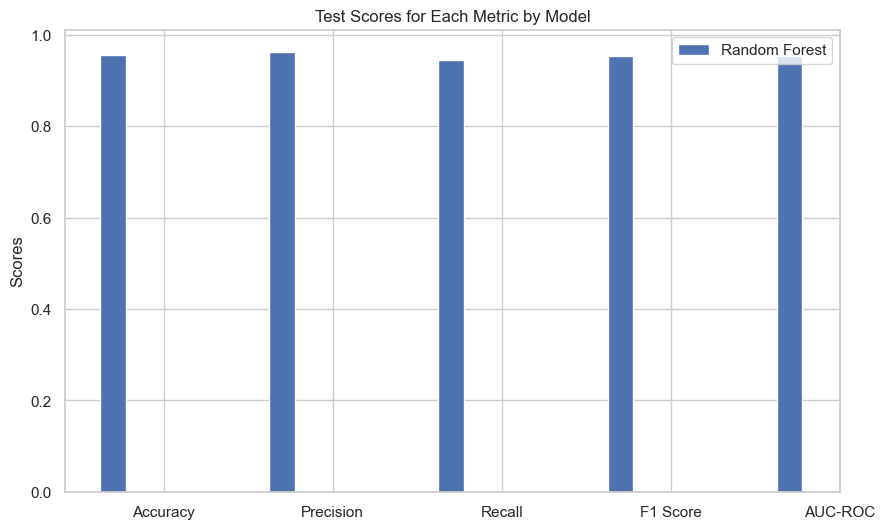

In [396]:
# Gráfico de barras para mostrar las métricas de prueba de cada modelo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
models_list = list(models.keys())
x = range(len(models_list))
width = 0.15
# Modificación del tamaño de la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(metrics))
width = 0.15

for i, model in enumerate(models_list):
    scores = [test_accuracy, test_precision, test_recall, test_f1, test_auc_roc]
    ax.bar([p + width*i for p in x], [score[model] for score in scores], width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Test Scores for Each Metric by Model')
ax.set_xticks([p + 2*width for p in x])
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

## CONCLUSION 

En un principio se evaluaron varios modelos, pero teniendo en cuenta los resultados de cada uno se decide quedarse con el modelo de Random Forest ya que ha mostrado un rendimiento sólido con un % mayor del 90 % de precisión en el conjunto de prueba, indicando una buena capacidad para predecir cancelaciones de productos bancarios. Con un F1 Score mayor del 90 % y un AUC-ROC mayor del 90 %, demuestra consistencia y eficacia en la evaluación de clientes propensos a cancelar servicios. Estos resultados respaldan su uso como una herramienta robusta para la retención de clientes en el sector bancario.

## exportar los datos con el modelo 

In [397]:
df_origin['Prediction'] = Y2

In [398]:
df_origin['Prediction'] = df_origin['Prediction'].replace({
    1 : 'Existing Customer',
    0: 'Attrited Customer'
})

In [399]:
df_origin['Prediction'].value_counts()

Prediction
Existing Customer    8224
Attrited Customer    1903
Name: count, dtype: int64

In [400]:
df_origin['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [401]:
df_origin.shape[0]

10127

In [402]:
equals_count = (df_origin['Prediction'] == df_origin['Attrition_Flag']).sum()
equals_count/df_origin.shape[0]

0.9484546262466673

Para facilidad en el manejo del powerBi decido hacer rangos de estas variables 

In [403]:
df_bi = range_df('Credit_Limit_range','Credit_Limit',df_bi)
df_bi = range_df('Avg_Open_To_Buy_range','Avg_Open_To_Buy',df_bi)
df_bi = range_df('Total_Amt_Chng_Q4_Q1_range','Total_Amt_Chng_Q4_Q1',df_bi)
df_bi = range_df('Total_Trans_Amtrange','Total_Trans_Amt',df_bi)
df_bi = range_df('Total_Ct_Chng_Q4_Q1_range','Total_Ct_Chng_Q4_Q1',df_bi)
df_bi = range_df('Avg_Utilization_Ratio_range','Avg_Utilization_Ratio',df_bi)
df_bi = range_df('Total_Revolving_Bal_range','Total_Revolving_Bal',df_bi)
df_bi = range_df('Total_Trans_Ct_range','Total_Trans_Ct',df_bi)

df_bi = df_bi.drop(['Total_Trans_Ct','Total_Revolving_Bal','Customer_Age','Credit_Limit','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], axis=1)

In [404]:
df_bi['Prediction'] = Y2

In [405]:
df_bi['Attrition_Flag'] = df_bi['Attrition_Flag'].replace({
   1 : 'Existing Customer',
   0 : 'Attrited Customer'
})

df_bi['Prediction'] = df_bi['Prediction'].replace({
   1 : 'Existing Customer',
   0 : 'Attrited Customer'
})


df_bi['Gender'] = df_bi['Gender'].replace({
    0: 'Male',
    1: 'Female'
})

In [408]:
df_origin.to_csv('Resultado_BankChurners.csv', index=False)
df_bi.to_csv('Resultado_BI.csv', index=False)